<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="logo.png" width="300" align='right'/></td></tr>     <tr><td>
            <h1><center>Aplicações Avançadas de Instrumentação MIEF/MIEB</center></h1>
            <h3><center>1st Semester - 2023/2024</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h1><center>Lab 1 - Python for scientific computation </center></h1></td></tr>
</table>

## Previous Requirments

Before the excution of this Laboratory it is necessary ro have installed the Anaconda application in your computer.   
Anaconda can be downloaded from: https://www.anaconda.com/docs/getting-started/anaconda/install

It is assumed there is already some comptences in the language Python. Anyway, if you feel that you need a fast review of the sintaxes, there is the document **Lab0 - Python Language** avalailable in this repositoty.

## Notes

As you should have notice, this document is prepared to be executed in Jupyter Notebook (ipynb). You can execute this laborarory using Jupyter Notebook, but if you prefeer to use IDE of spyder or pycharm, feel free to do it.

In [2]:
#import the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Numpy and Scipy

__Exercise 1__: Generate data from a known linear model with some noise. request to the user the value of $\beta_0$ and $\beta_1$ and the range of x and $\epsilon$.

$y = \beta_0 + \beta_1 x + \epsilon$

In [3]:
np.random.normal?

number of samples100

slope 4.939229199897477 
intercept 0.16870473515286477 
std_err 0.10594368873160401


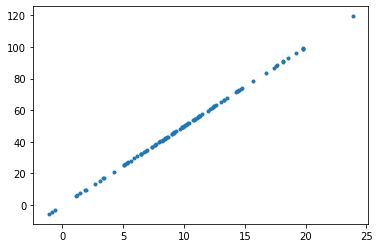

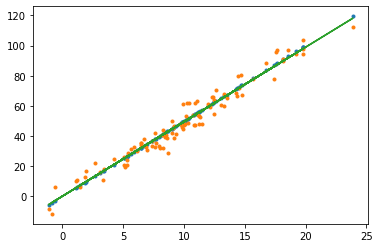

In [4]:
from scipy import stats

#generate a linear model y=ax+b
n_samples = int(input('number of samples'))
a=5
b=0
x = np.random.normal(10, 5, n_samples)
plt.figure(1)
y = a*x + b
plt.plot(x,y,'.')

#gerate plot
plt.figure(2)
plt.plot(x,y,'.')

#add noise to model
e = np.random.normal(0, 5, n_samples)
y = y + e

plt.plot(x,y,'.')    #plot with noise

#take stats for linear model (scipy.stats)
(slope, intercept, r_value, p_value, std_err) = stats.linregress(x, y)
print('\nslope', slope, '\nintercept',intercept, '\nstd_err', std_err)

#draw in figure 2 the linear regression line 
plt.plot(x, slope*x + intercept);


__Exercise 2:__ Count all zero crossings in a vector. Use a sine function to test your implementation.

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False]
number of zero crossing =  3


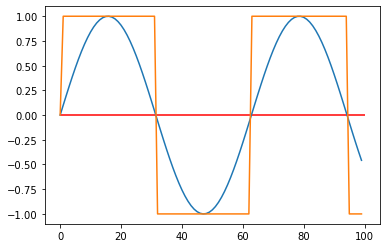

In [5]:
#define a sin as test signal
signal = np.sin(np.arange(0, 10, 0.1))

#plot signal
plt.figure()
plt.plot(signal)
plt.hlines(0, 0, len(signal), color='red');

#find the sign of signal
sign = np.sign(signal)
plt.plot(sign)

#make a list when the signal changes
#print(np.diff([1,5,3, 1, -1]))   #for test only
sign_changes = np.abs(np.diff(sign)) == 2
print(sign_changes)              #for test only
total = np.sum(sign_changes)
print("number of zero crossing = ", total)

__Exercise 3__: Interpolate using a spline the function `f(x) = x**2 + 10 * sin(x)` where $x \in [-10, 10]$, and compare the error depending on the
inicial sampling frequency.

In [6]:
#function
def func(x):
    return x**2 + 10 * np.sin(x)

Step: 1
Cubic slines. Step:  1.0  	Error: 0.028135648051746093
Linear. Step:  1.0  	Error: 0.526249365487583


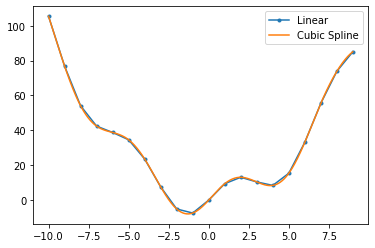

In [7]:
from scipy import interpolate

#input step
step = float(input('Step: '))

#generate function
x=np.arange(-10,10, step)
#print(x)R
y=func(x)
#print(y)

#x points for new data
xnew = np.arange(-10,10-step, 1/100)

#interpolate with cubic splines to 100 samples
tck = interpolate.splrep(x, y) #find the cubic spline for the data
ynew = interpolate.splev(xnew, tck, der=0) #interpolate data for xnew

#linear interpolation
f=interpolate.interp1d(x, y, 'linear')  #'cubic' for cubic interpolation
ynew2=f(xnew)  #interpolate data for xnew

# mean absolute error between interpolated function and original
#cubic slines
mae = np.mean(np.abs(ynew - func(xnew)))
print('Cubic slines. Step: ', step, ' \tError:', mae)

#linear
mae = np.mean(np.abs(ynew2 - func(xnew)))
print('Linear. Step: ', step, ' \tError:', mae)

#visualization
plt.figure()
plt.plot(x, y, ".-", label='Linear')
plt.plot(xnew, ynew, label='Cubic Spline')
plt.legend();


## Matplotlib

__Exercise 4__: Considerer the folowing function x:

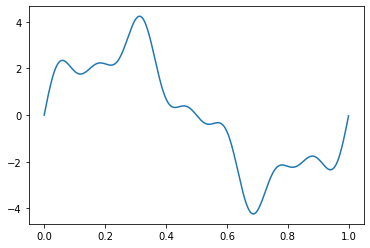

In [8]:
#see: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

import numpy as np

# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure()
plt.plot(t, x)

Using the fft implementation of scipy or numpy and using matplotlib, plot the amplitude of x in fuction of time and the fft amplitude in function of the frequency. The frequencies are the expected ones?

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


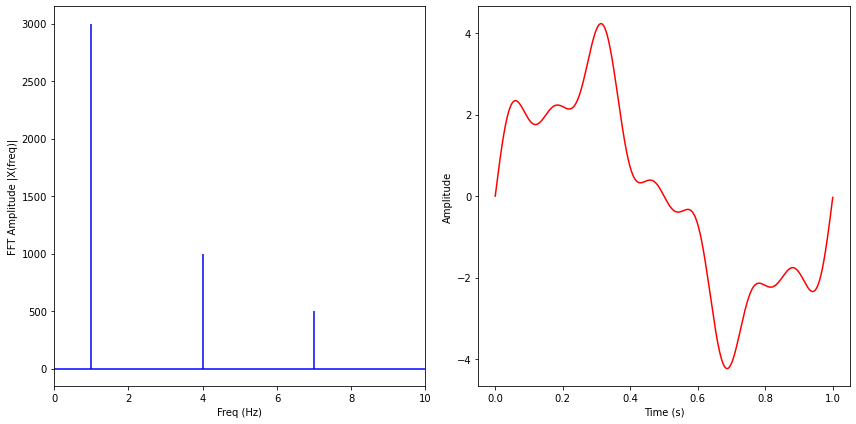

In [9]:
# numpy implementation

from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


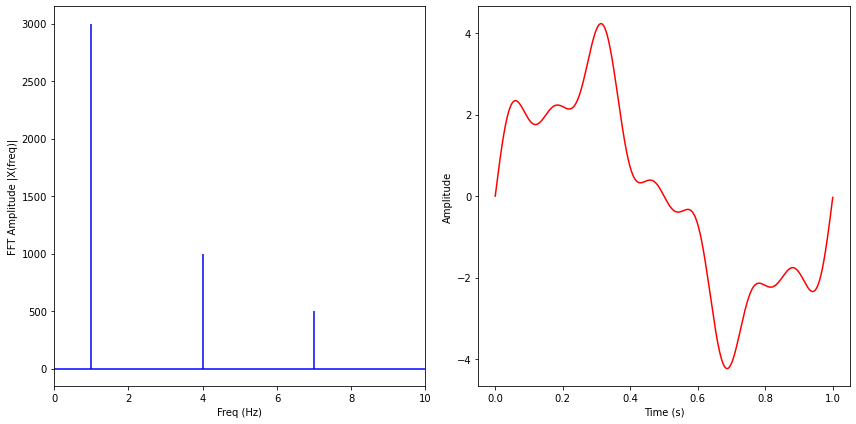

In [10]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

__Exercise 5__: Implement a root finding algorithm by the Newton method:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

Consider a stop condition for $x_n ~ x_{n+1}$

find the roots for the equation:

`f(x) = x**2 + x - 2` (recall that: `f'(x) = 2x + 1`)

Plot the function and mark the two zeros

In [11]:
def func(x):
    return x**2 + x - 2

def func_d(x):
    return 2 * x + 1

def newton(x0):   
    for n in range(0,100):         #max 100 iteractions
        x1=x0-func(x0)/func_d(x0)
        #print(x1)     #for test only
        if  np.abs(x0-x1) < 0.001: #error max
            return x1 
        x0=x1
    return False

1.0000000761328276
-2.0000000042242396


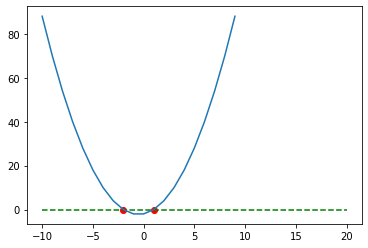

In [28]:
x = np.arange(-10, 10)

plt.figure()
plt.plot(x,func(x))
plt.hlines(0, -10, len(x), color='green', ls='dashed');

#first solution
x0=10
x1=newton(x0)
print(x1)
plt.scatter(x1, func(x1), color='red')

#second solution
x0=-10
x1=newton(x0)
print(x1)
plt.scatter(x1, func(x1), color='red')


__Exercise 6__: Solve previous equation with sympy `f(x) = 0`
with `f(x) = x**2 + x - 2`

In [13]:
def func(x):
    return x**2 + x - 2

In [14]:
from sympy.solvers import solve
from sympy import Symbol

xs = Symbol('x')
roots=solve(func(xs), xs)
print('roots',roots)

roots [-2, 1]


__Exercise 7__: Do a complete annotated plot and export to pdf.

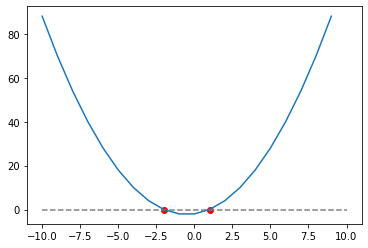

In [15]:
plt.figure()
plt.plot(x, func(x))
plt.scatter(roots[0], func(roots[0]), color='red')
plt.scatter(roots[1], func(roots[1]), color='red')
plt.hlines(0, -10, 10, color='gray', ls='dashed')
plt.savefig('figure.pdf') 

__Exercise 8__: On the clean ECG signal annotate every beat with a vertical line and a cross on the R wave.

ECG type:  <class 'list'>
Lengh of list ECG 2
Lengh of index[0] 25000


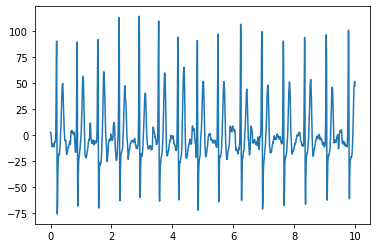

In [16]:
# Read ecg file
with open("cleanecg.txt", "r") as fl:
    ecg = fl.readlines()
fl.close()

print('ECG type: ', type(ecg))
print('Lengh of list ECG', len(ecg))
print('Lengh of index[0]', len(ecg[0]))

t = np.array(ecg[0].split()).astype(float)
s = np.array(ecg[1].split()).astype(float)


#print(t[1:10])     #for test only
#print(s[1:10])     #for test only

plt.figure()
plt.plot(t,s)

2
[ 20  87 156 225 291 355 418 482 550 624 694 764 834 905 978]
{'peak_heights': array([ 90.56794882,  89.86984117,  92.04658544, 113.14012885,
       114.52728934, 109.96187016,  94.17881363,  91.1494787 ,
        97.22195241, 106.77087202,  99.68577612,  90.60655272,
        94.12001685,  96.77816451, 101.11600992])}

Peak Location:  [ 20  87 156 225 291 355 418 482 550 624]
Peak Hight:  [ 90.56794882  89.86984117  92.04658544 113.14012885 114.52728934
 109.96187016  94.17881363  91.1494787   97.22195241 106.77087202]


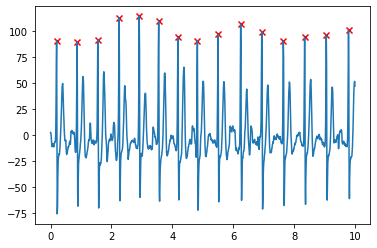

In [17]:
from scipy.signal import find_peaks

pks= find_peaks(s, height=75)

print(len(pks))
print(pks[0])    #list
print(pks[1])    #dictionary

print('\nPeak Location: ', pks[0][0:10])
print('Peak Hight: ', pks[1]['peak_heights'][0:10]) #'peak_heights - properties of scipu find_peaks'

plt.figure()
plt.scatter(t[pks[0]], pks[1]['peak_heights'], marker='x', color='r')
plt.plot(t, s)

__Exercise 9__: Adjust the graphic so that you can visualize two beats from the ECG signal

Time index of the third peak: 156


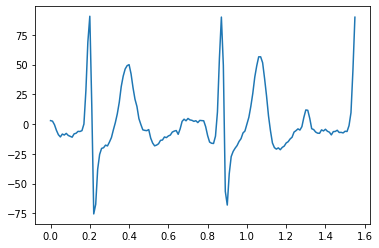

In [18]:
t2 = t[pks[0][0:2]]
print('Time index of the third peak:', pks[0][2])

plt.figure()
plt.plot(t[0:pks[0][2]],s[0:pks[0][2]])

__Exercise 10__: Create an histogram of the ECG signal and subplot it with Exercise 8 graphic

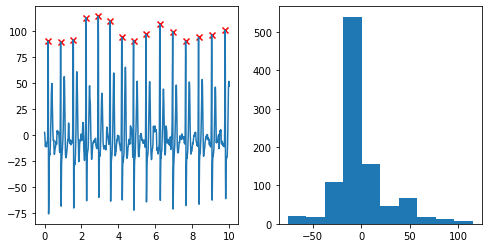

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(t[pks[0]], pks[1]['peak_heights'], marker='x', color='r')
axs[0].plot(t, s)
axs[1].hist(s);